#Outfit Tags and Groups Exploration
In this notebook, I explore the categories where the outfits are grouped into their respective groups.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/RecSys_206894495'

In [ ]:
!pip install pyarrow

import warnings
warnings.filterwarnings('ignore')

#Import libreirs
import pandas as pd
import numpy as np
import re

#Visulizetion
import seaborn as sns
import matplotlib.pyplot as plt

#Garbage collector
import gc

#Random
import random
#Set random seed
RSEED = 10
random.seed(RSEED)

In [ ]:
outfits=pd.read_parquet(path+'/archive/data/outfits.parquet',engine='pyarrow')
outfits.head()

,id,name,description,group,owner,timeCreated,retailPrice,pricePerWeek,pricePerMonth,outfit_tags,tag_categories
0,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Out of stock - Asymmetric Frilled Dress,"This fun, short dress features and asymmetric ...",group.50a586c78eb7626e294ba3bd07d12c79,o_00053,2017-12-30 11:28:01.000,4000.0,600.0,1200.0,"['Synthetic', 'Statement', 'Dresses', 'Metalli...","['Material', 'Occasion', 'Category', 'Details'..."
1,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Yellow Shell Mellomholmene Blouse,This beautiful blouse features an adjustable n...,group.61ad2fcabb3e9197e3836376e6b67f2c,o_00577,2021-06-07 12:07:22.921,1300.0,590.0,1180.0,"['ILAG', 'Tops', 'Spring', 'Summer', 'M', 'Pat...","['Brand', 'Category', 'Seasons', 'Seasons', 'S..."
2,outfit.fff175b13ceb453f9928625491412ede,Kaula Dress Black,Kaula from Rodebjer is a fitted dress made in ...,group.37c2b59d63d3a9c2d58e07f532f71f7f,o_00336,2023-06-05 09:17:59.004,3100.0,930.0,1860.0,"['Black', 'Mini', 'M', 'Everyday', 'Multi Seas...","['Color', 'Length', 'Size', 'Occasion', 'Seaso..."
3,outfit.ffef9d7c292a48b69076d2df2e32352f,For sale - Jarvis Blouse,This wrap blouse has mid length sleeves and a ...,group.dfcaa57546b0b7a5e9eb204449b6cc1c,o_00030,2021-05-18 14:02:28.690,1500.0,590.0,1180.0,"['XS', 'Multi Season', 'Stylein', 'Tops', 'Cot...","['Size', 'Seasons', 'Brand', 'Category', 'Mate..."
4,outfit.ffeef842238f4dbdabc6c730a75aa2bd,Black Amber Pants,"Feel slack and nice dressed with this pant, ma...",group.ee297c977905eb21a123a4aea5fbb6d2,o_00602,2021-07-16 14:02:30.643,1200.0,590.0,1180.0,"['Cotton', 'Black', 'Everyday', 'Knitwear', 'L...","['Material', 'Color', 'Occasion', 'Category', ..."


In [ ]:
outfits['group'].nunique()

9755

In [ ]:
outfit_tags=pd.read_parquet(path+'/archive/data/outfit_tags.parquet',engine='pyarrow')
outfit_tags.head()

,id,tag,category
0,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Synthetic,Material
1,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Statement,Occasion
2,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Dresses,Category
3,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Metallic,Details
4,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Mini,Length


In [ ]:
# Merge with outfits on the id column
merged_df = pd.merge(outfit_tags, outfits, on='id')
merged_df.columns

Index(['id', 'tag', 'category', 'name', 'description', 'group', 'owner',
       'timeCreated', 'retailPrice', 'pricePerWeek', 'pricePerMonth',
       'outfit_tags', 'tag_categories'],
      dtype='object')

In [ ]:
grouped_outfits = merged_df.groupby(['group', 'tag', 'category']).agg(
    outfits_num=('id', 'count'),
    retailPrice=('retailPrice', 'mean'),
    pricePerWeek=('pricePerWeek', 'mean'),
    pricePerMonth=('pricePerMonth', 'mean'),
    timeCreated=('timeCreated', 'first')
).reset_index()

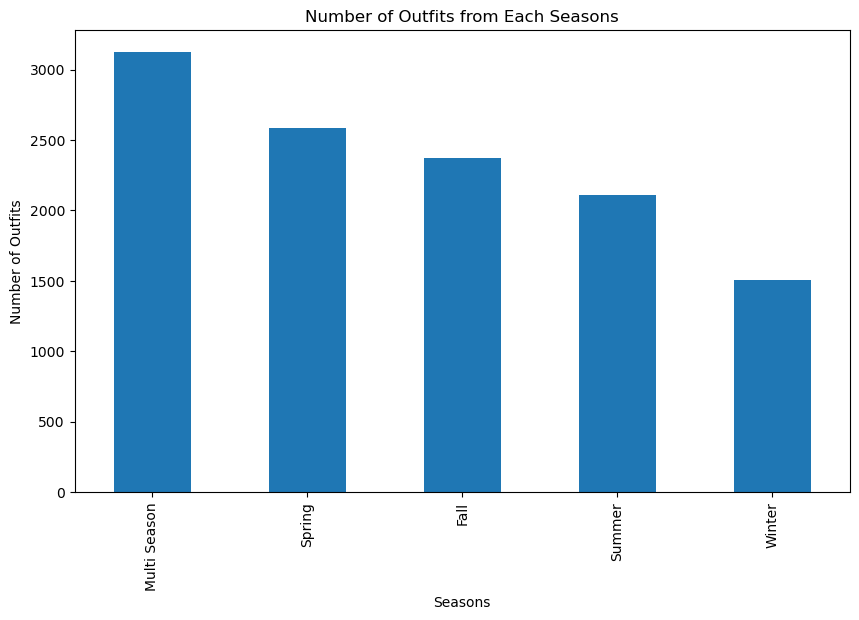

In [ ]:
# Filter the dataframe where category is 'Seasons'
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Seasons']

# Plot the number of purchases from each season
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Seasons')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Seasons')
plt.show()


opion - Multi Season as 1 for all

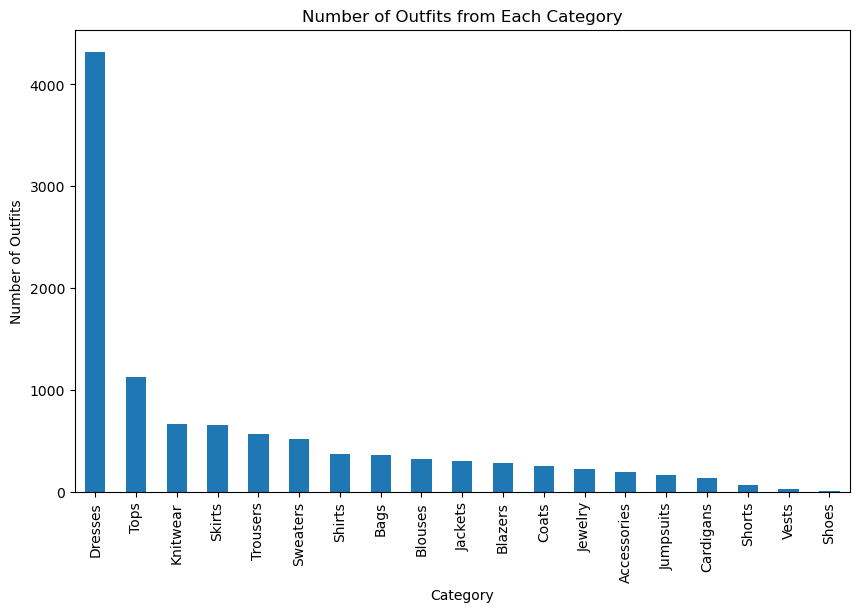

In [ ]:
# Filter the dataframe where category is 'Category'
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Category']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Category')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Category')
plt.show()


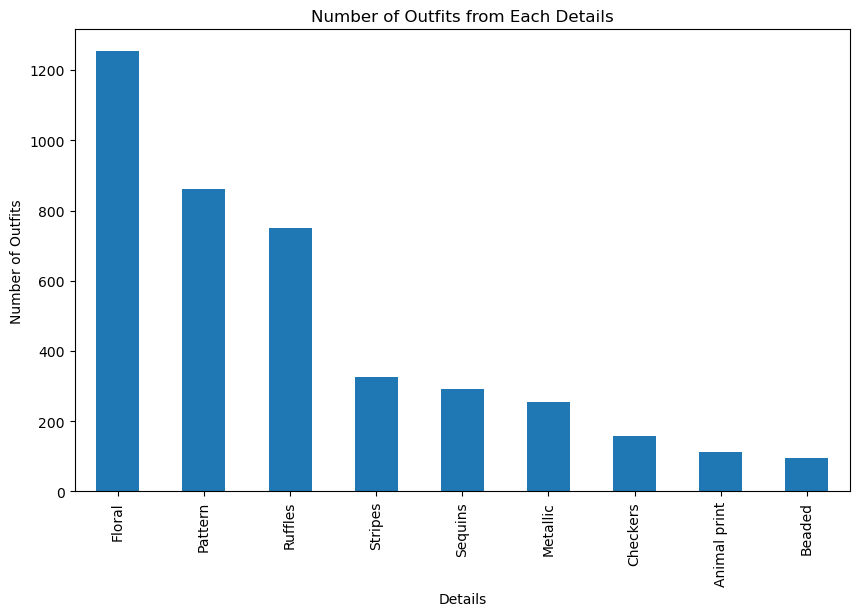

In [ ]:
# Filter the dataframe where category is 'Details'
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Details']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Details')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Details')
plt.show()


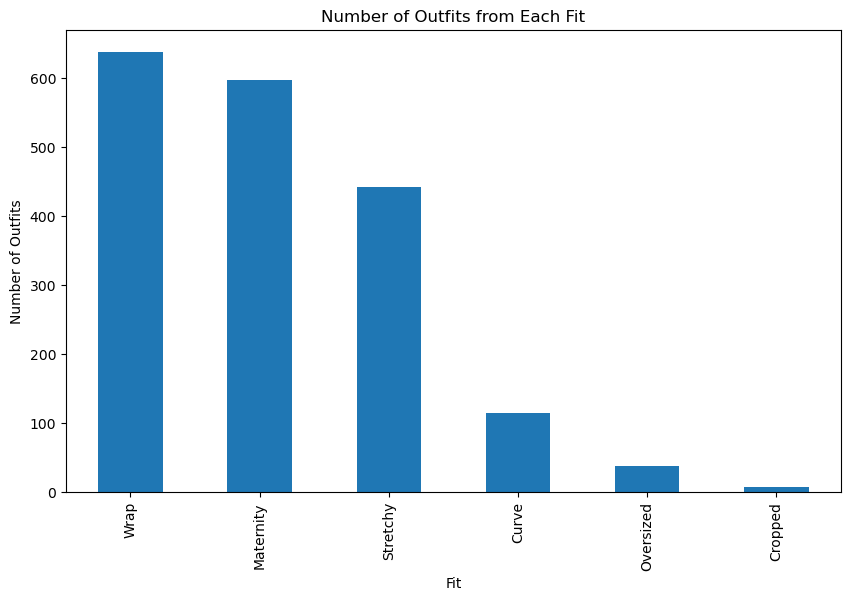

In [ ]:
# Filter the dataframe where category is 'Fit'
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Fit']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Fit')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Fit')
plt.show()


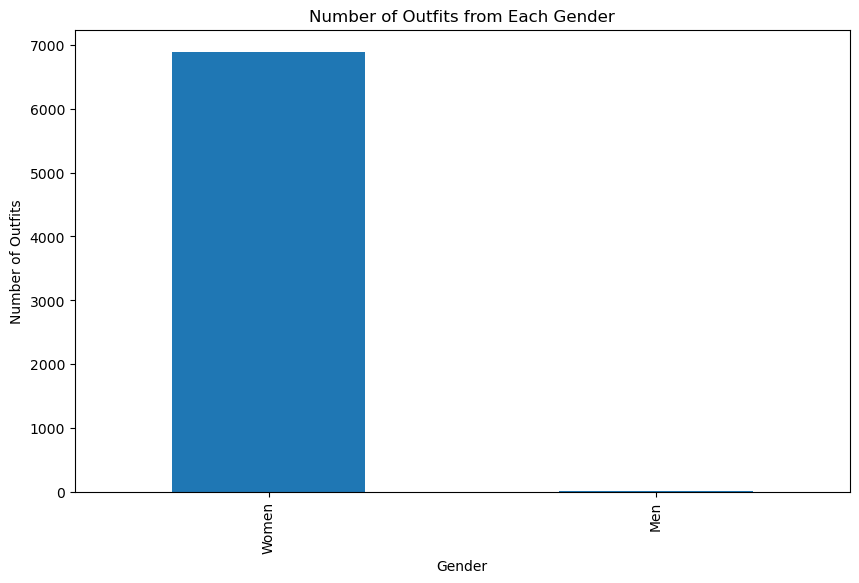

In [ ]:
# Filter the dataframe where category is 'Gender'
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Gender']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Gender')
plt.show()


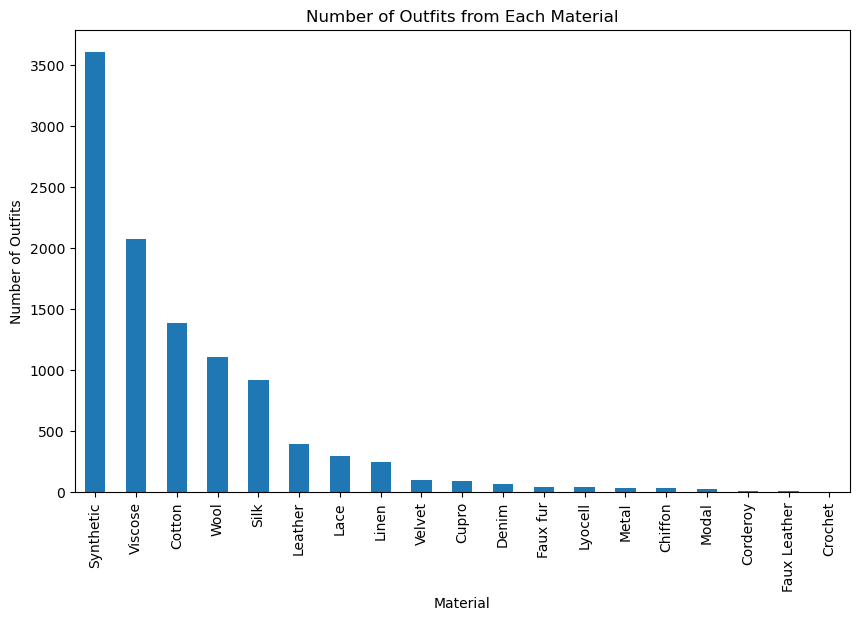

In [ ]:
# Filter the dataframe where category is 'Material'
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Material']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Material')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Material')
plt.show()


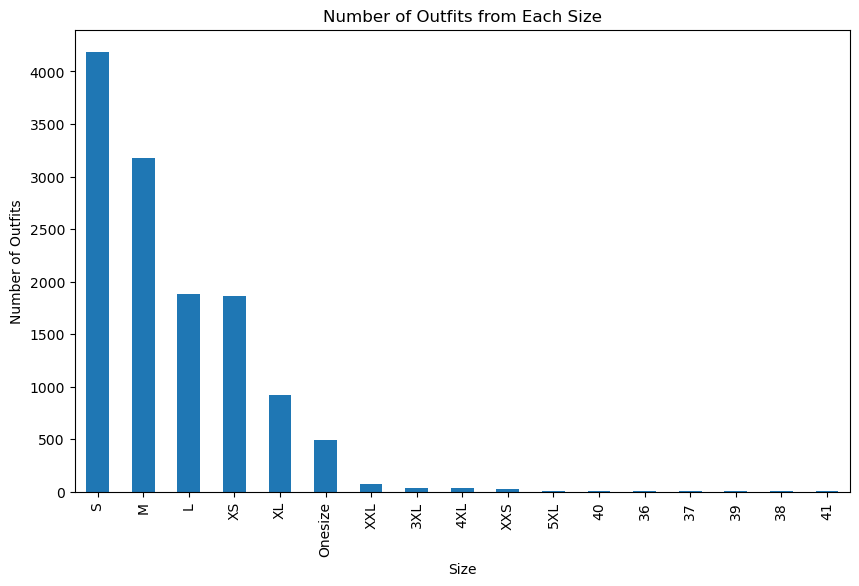

In [ ]:
# Filter the dataframe where category is 'Category'
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Size']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Size')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Size')
plt.show()


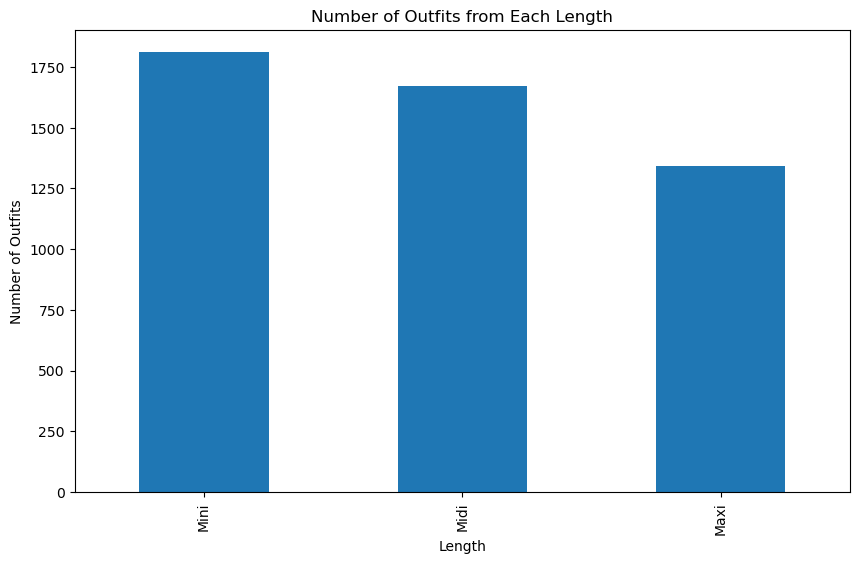

In [ ]:
# Filter the dataframe where category is 'Length'
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Length']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Length')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Length')
plt.show()


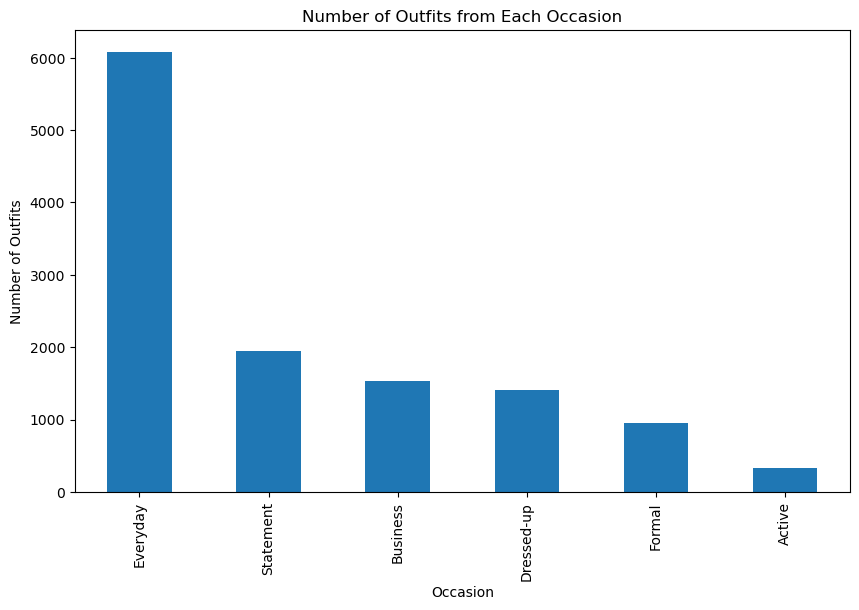

In [ ]:
# Filter the dataframe where category is 'Occasion'
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Occasion']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Occasion')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Occasion')
plt.show()


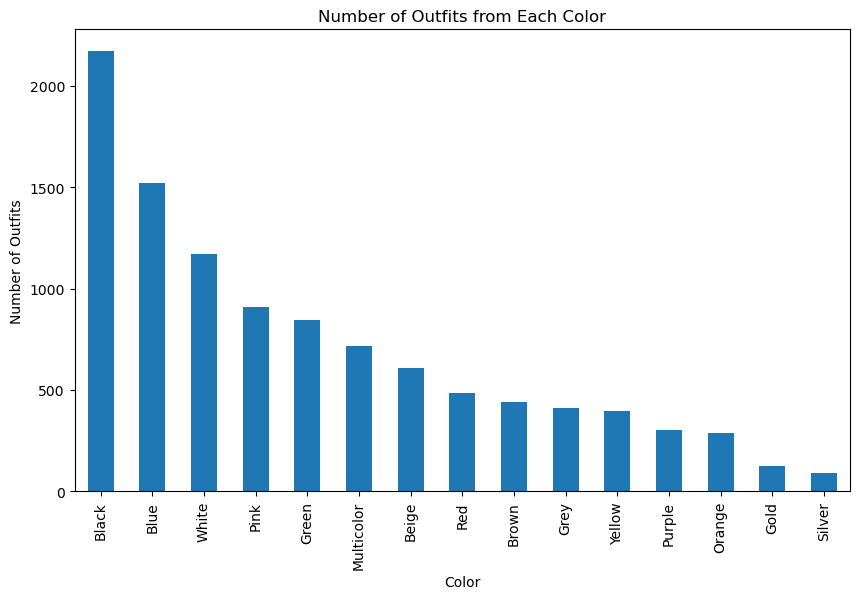

In [ ]:
# Filter the dataframe where category is 'Color'
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Color']

# Plot the number of purchases from each Category
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Color')
plt.ylabel('Number of Outfits')
plt.title('Number of Outfits from Each Color')
plt.show()


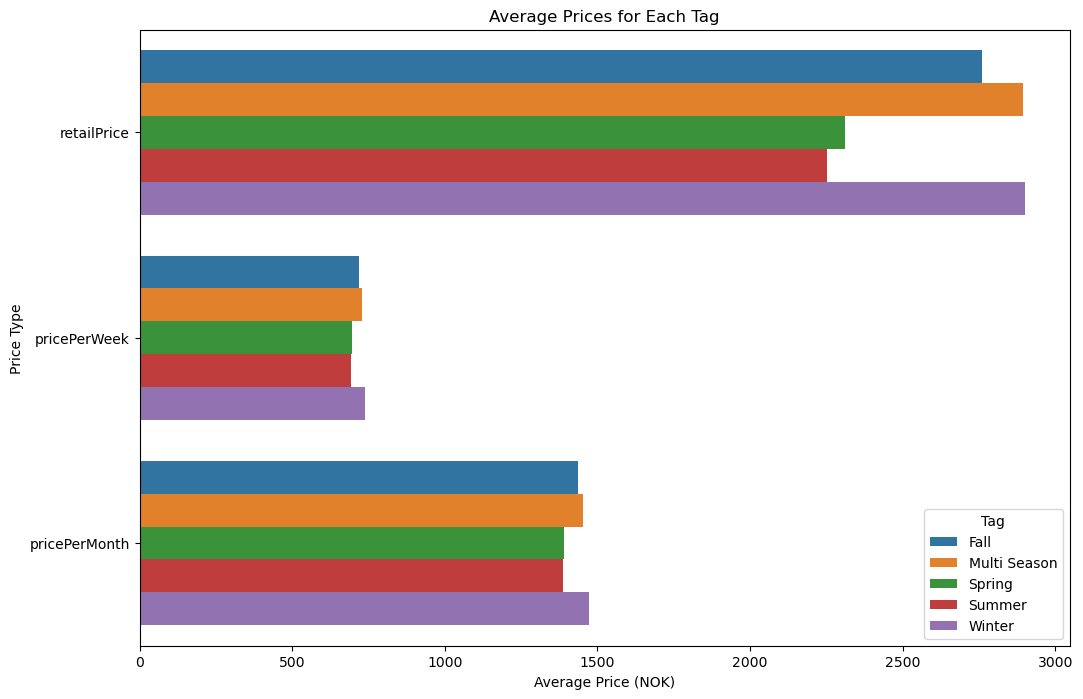

In [ ]:
# Filter the dataframe to category "Seasons"
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Seasons']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag')
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

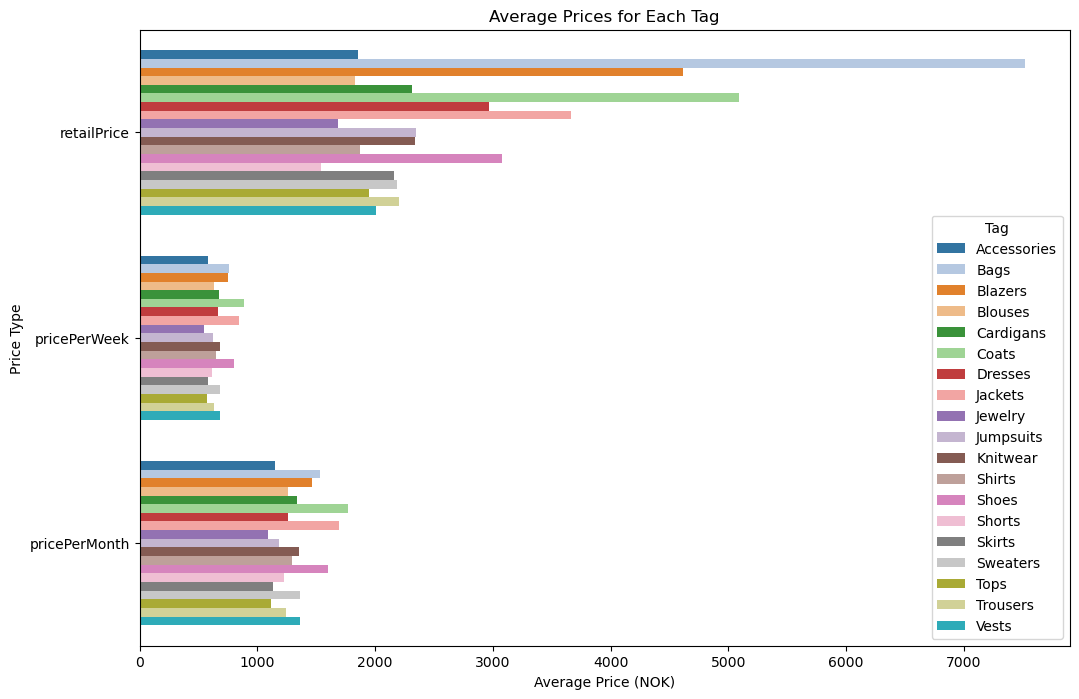

In [ ]:
# Filter the dataframe to category "Category"
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Category']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Define a color palette
custom_palette = sns.color_palette("tab20", len(tags))

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag',palette=custom_palette)
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

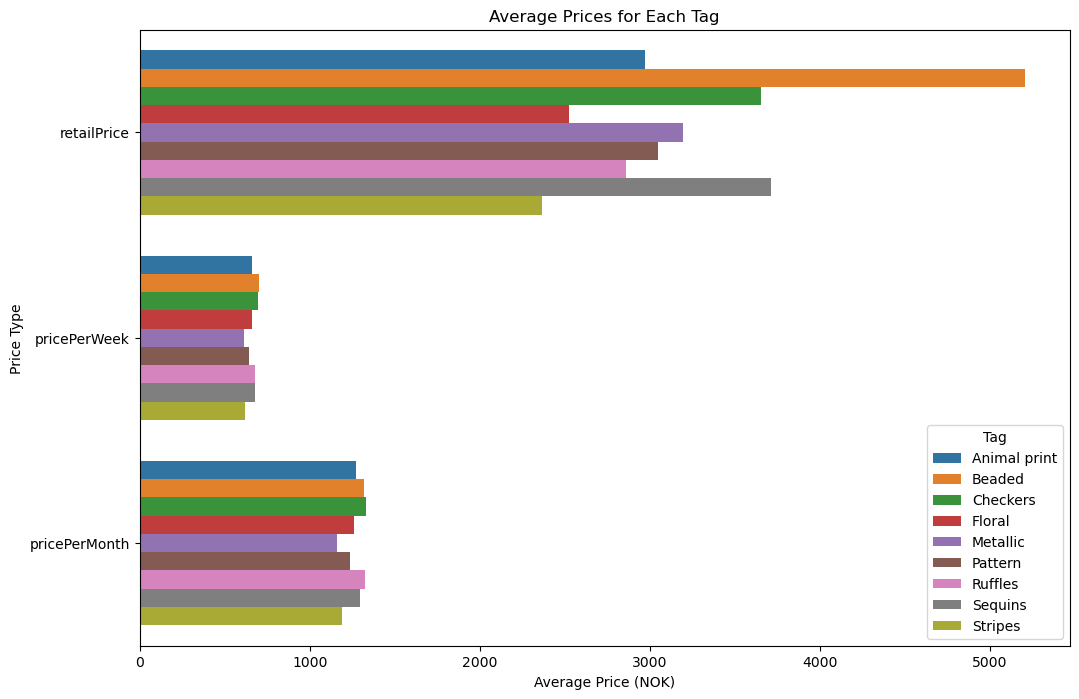

In [ ]:
# Filter the dataframe to category "Details"
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Details']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag')
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

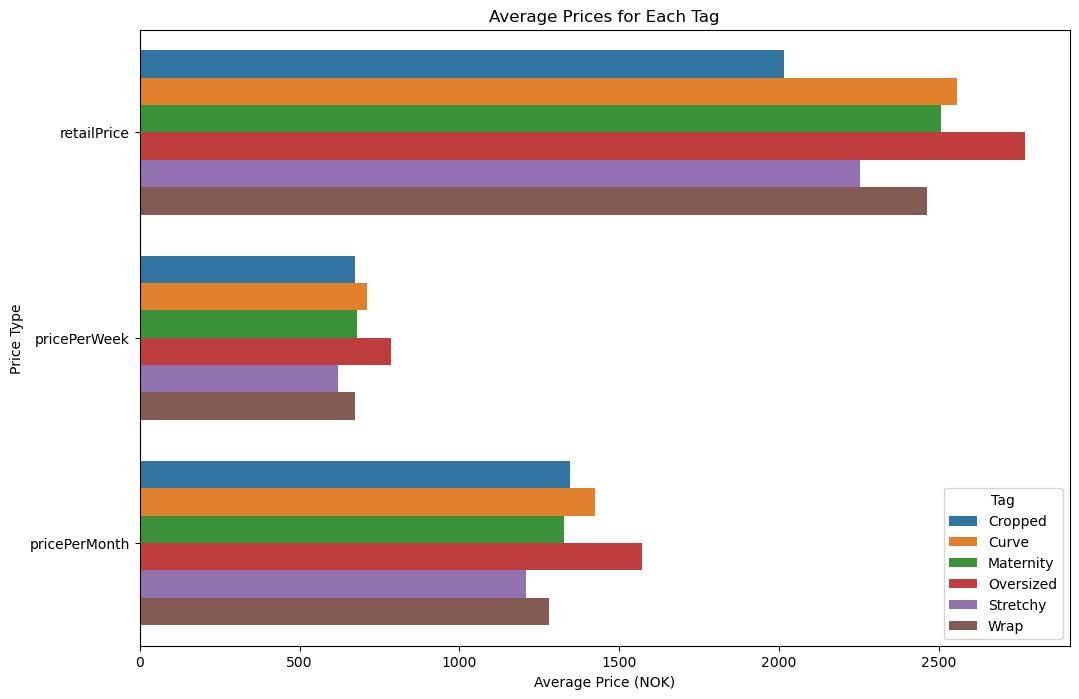

In [ ]:
# Filter the dataframe to category "Fit"
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Fit']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag')
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

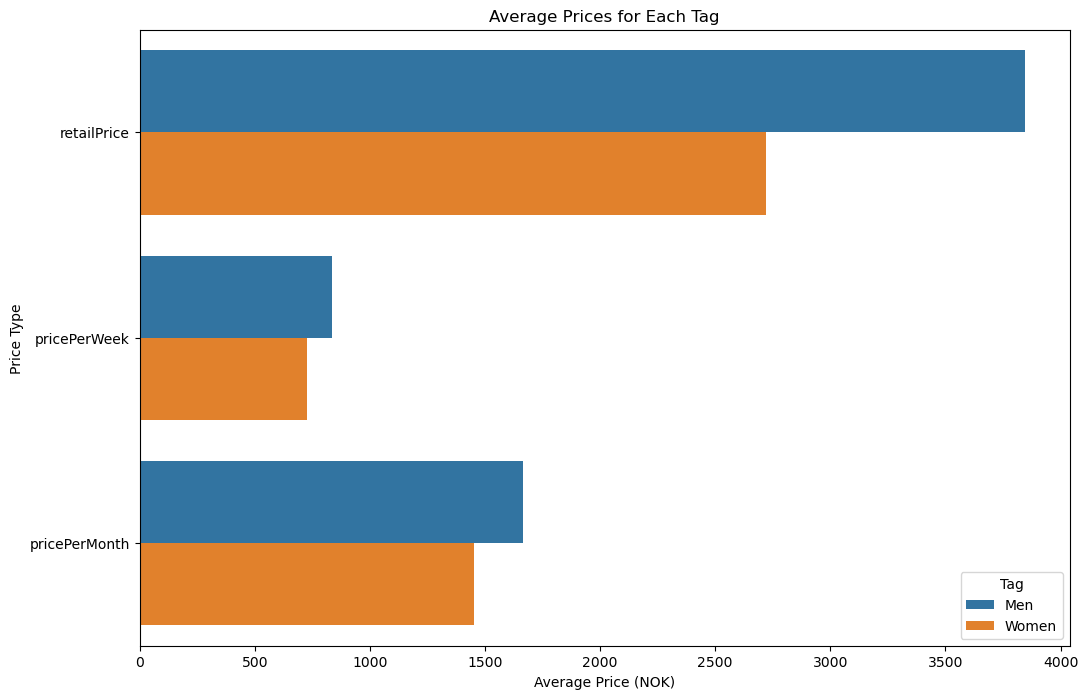

In [ ]:
# Filter the dataframe to category "Gender"
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Gender']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag')
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

Women will pay more

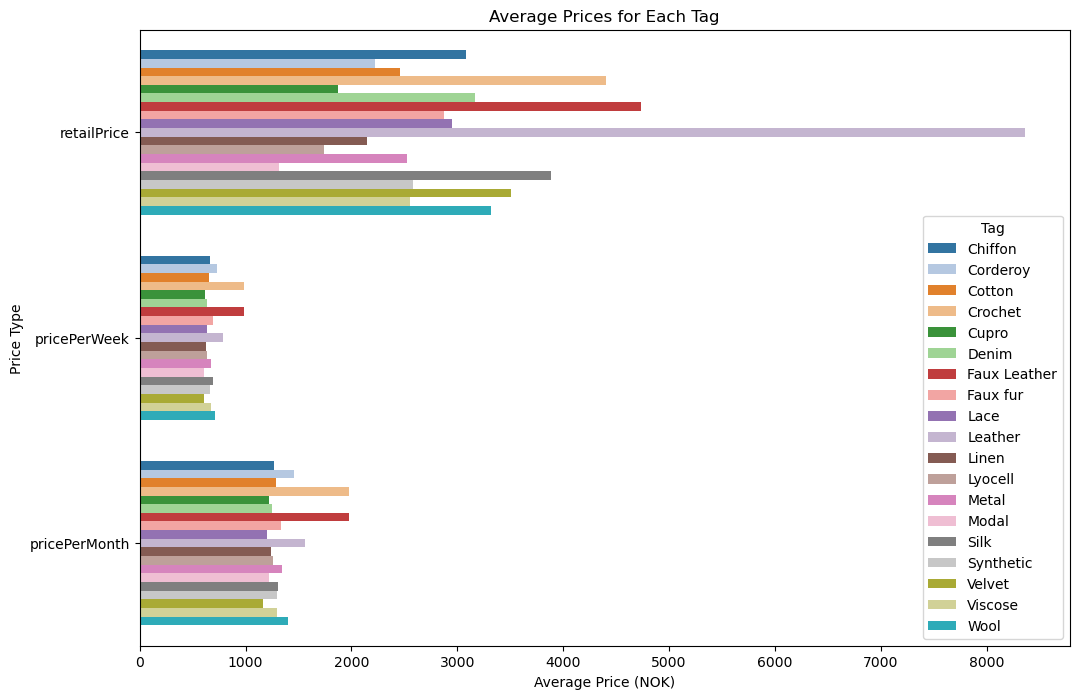

In [ ]:
# Filter the dataframe to category "Material"
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Material']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Define a color palette
custom_palette = sns.color_palette("tab20", len(tags))

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag',palette=custom_palette)
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

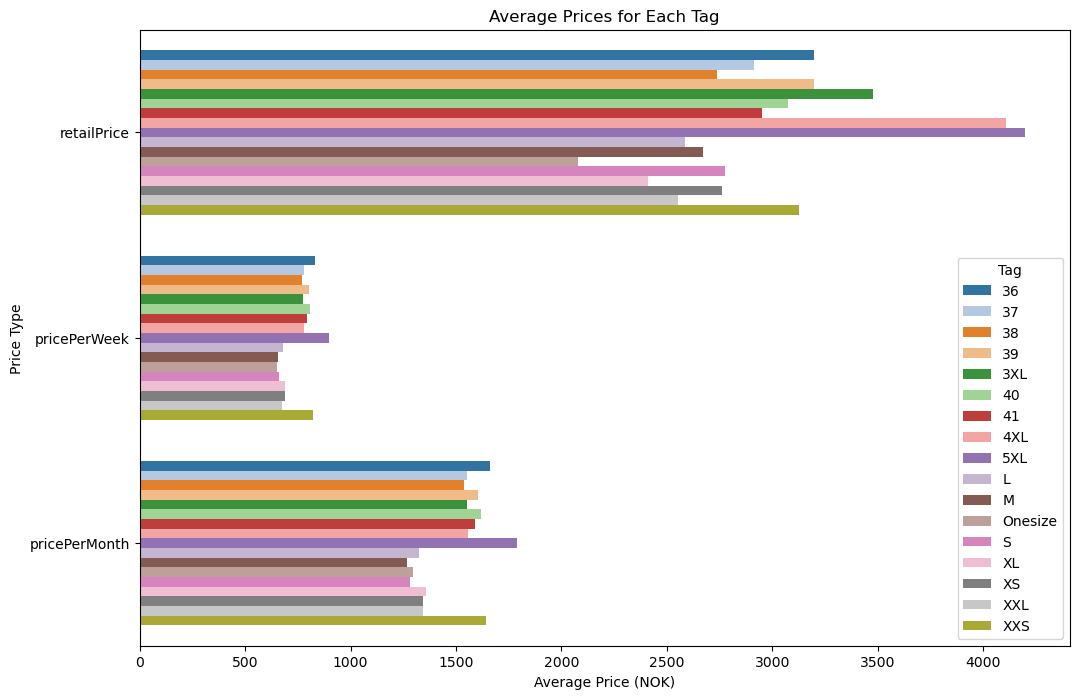

In [ ]:
# Filter the dataframe to category "Size"
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Size']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Define a color palette
custom_palette = sns.color_palette("tab20", len(tags))

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag',palette=custom_palette)
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

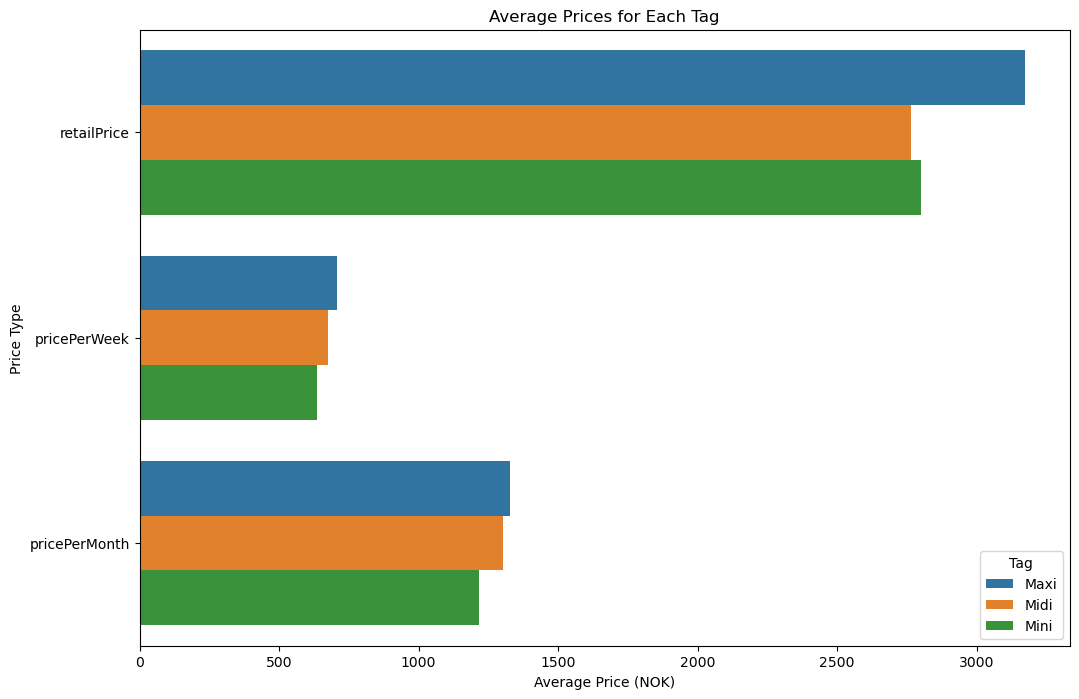

In [ ]:
# Filter the dataframe to category "Length"
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Length']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag')
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

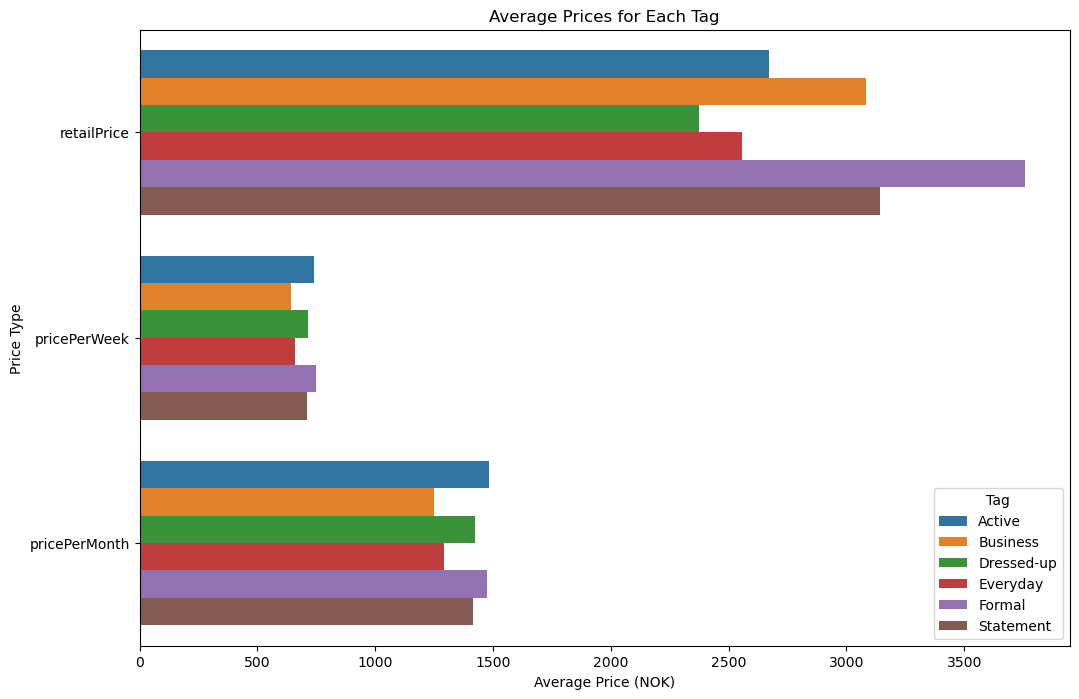

In [ ]:
# Filter the dataframe to category "Occasion"
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Occasion']

# Get the unique tags
tags = filtered_df['tag'].unique()

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag')
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()

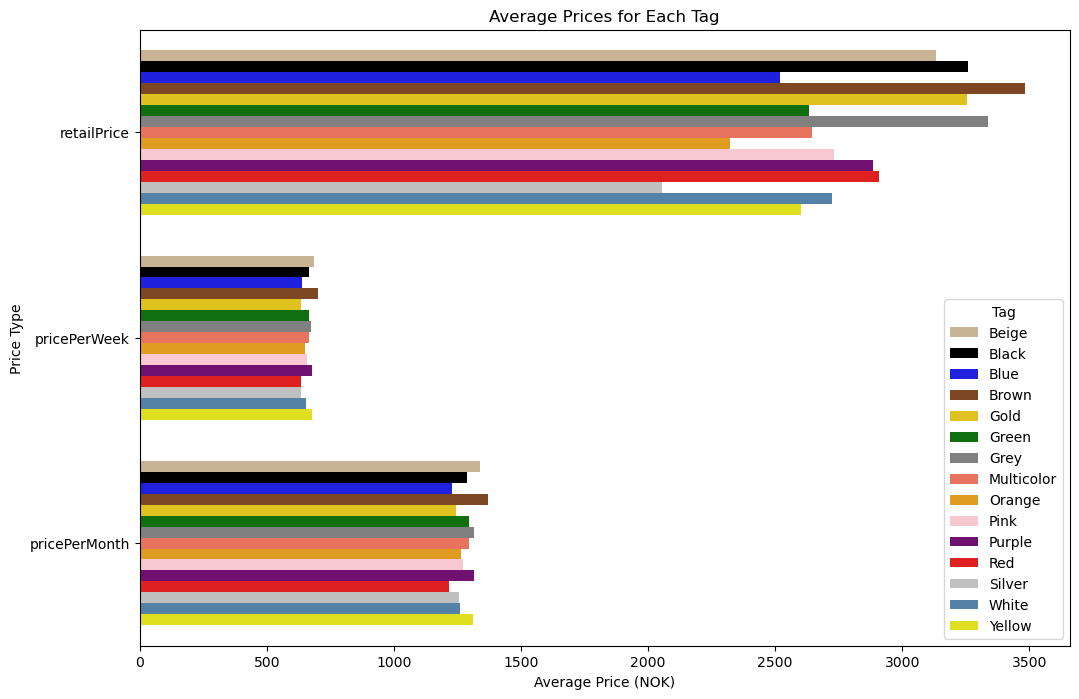

In [ ]:
# Filter the dataframe according to category='Color'
filtered_df = grouped_outfits[grouped_outfits['category'] == 'Color']

# Define the list of tags and corresponding colors
tags = ['Beige', 'Black', 'Blue', 'Brown', 'Gold', 'Green', 'Grey', 'Multicolor', 'Orange', 'Pink', 'Purple', 'Red', 'Silver', 'White', 'Yellow']
colors = ['#D2B48C', '#000000', '#0000FF', '#8B4513', '#FFD700', '#008000', '#808080', '#FF6347', '#FFA500', '#FFC0CB', '#800080', '#FF0000', '#C0C0C0', '#4682B4', '#FFFF00']

# Create a dictionary to map tags to colors
tag_color_map = dict(zip(tags, colors))

# Create a custom palette based on the tag_color_map
custom_palette = [tag_color_map[tag] for tag in tags]

# Create a plot that compares the average from each price column for each tag
price_columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
avg_prices = filtered_df.groupby('tag')[price_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
avg_prices_melted = avg_prices.melt(id_vars='tag', var_name='Price Type', value_name='Average Price')
sns.barplot(data=avg_prices_melted, x='Average Price', y='Price Type', hue='tag', palette=custom_palette)
plt.title('Average Prices for Each Tag')
plt.xlabel('Average Price (NOK)')
plt.ylabel('Price Type')
plt.legend(title='Tag')
plt.show()
